# Acceptability conditions of models with Master polytropic EoS

## Condition C7: Harrison-Zeldovich-Novikov stability condition 

This notebook graphically shows, for different values of the polytropic index $n$ and anisotropic factor $C$, the fulfillment (or not) of physical acceptability conditions in relativistic anisotropic spheres with master polytropic equation of state
\begin{equation}
    P = \kappa \rho^{1+\frac{1}{n}} + \alpha \rho - \beta \,.
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.integrate import solve_ivp
from numpy import diff

In [2]:
plt.rc('text', usetex = True)
plt.rc('font', **{'family' : "sans-serif"})
params = {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

# Compact object modeling

## Structure equations

The structure equations are the result of manipulating the Einstein field equations for a given metric and energy tensor. They are the equations to be solved to model compact objects. In the case of static conigurations, with spherical symmetry and anisotropic pressure, the structure equations consist of
\begin{eqnarray}
P^{\prime} &=& - \left(\rho + P \right) \frac{m + 4 \pi r^{3} P}{r(r - 2m)} + \frac{2}{r} \left(P_{\perp} - P \right)  \label{EqHid} \tag{1} \\
m^{\prime} &=& 4 \pi r^{2} \rho \label{MasDif} \tag{2}
\end{eqnarray}
where $\rho$ is energy density, $m$ is mass, $P$ is radial pressure and $P_{\perp}$ is tangential pressure. The prime denotes derivative with respect to $r$.

## Equation of State

An equation of state (EoS) is a mathematical model between state variables that describes the most important physical processes that occur in a thermodynamic system. The master polytropic EoS consists of a relationship such that
\begin{equation}
P = \kappa \rho^{1+\frac{1}{n}} + \alpha \rho - \beta \,. \label{PoliMaestra} \tag{3}
\end{equation}

On the other hand, the anisotropic pressure is supposed to be of the form
\begin{equation}
\Delta\equiv P_{\perp} - P = C r (\rho + P) \frac{m + 4 \pi r^3 P}{r(r-2m)} \,, \label{Anisotropia} \tag{4}
\end{equation}
such that equation $\eqref{EqHid}$ is as
\begin{equation}
\frac{\mathrm{d}P}{\mathrm{d}r} = - h \frac{(\rho + P)(m + 4 \pi  r^3 P)}{r(r-2m)} \,, \label{EqHidCos} \tag{5}
\end{equation}
where $h = 1 - 2C$, and $C$ quantifies the anisotropy in the model.

## Lane-Emden equation

The structure equations can be written dimensionless when they are endowed with polytropic EoS. The result is known as the Lane-Emden equation, given by the change of variables
\begin{equation}
\Psi^{n}(\xi) = \frac{\rho}{\rho_{c}} \ , \ \ \eta \left(\xi \right) = \frac{m}{4 \pi \rho_c a^{3}} \quad \textrm{and} \quad r = a\xi \,,
\end{equation}
where
\begin{equation}
a^{2} = \frac{\Upsilon \left(n + 1 \right)}{4 \pi \rho_c} \ , \ \ \Upsilon = \kappa \rho_{c}^{1/n} = \frac{\sigma - \alpha \left(1 - \varkappa \right)}{1 - \varkappa^{1 + \frac{1}{n}}} \ , \ \ \sigma = \frac{P_{c}}{\rho_{c}} \quad \textrm{and} \quad \varkappa = \frac{\rho_{b}}{\rho_{c}} \,.
\end{equation}
The subscripts $c$ and $b$ indicate that the variable is evaluated at the center and surface of the configuration, respectively.

In this way, the dimensionless EoS $\eqref{PoliMaestra}$ and $\eqref{Anisotropia}$ are
\begin{eqnarray}
P &=& \rho_c \left\{\Upsilon \left( \Psi^{n+1} - \varkappa^{1 + \frac{1}{n}} \right) + \alpha \left(\Psi^{n} - \varkappa \right)\right\}  = \rho_c \mathcal{P} \quad \textrm{and} \label{PAdi} \tag{6} \\
\Delta &=& \frac{C \Upsilon (n+1) \left(\eta + \xi^{3} \mathcal{P} \right) \left(\Psi^{n} + \mathcal{P} \right) \rho_{c}}{\xi - 2  \Upsilon \left( n+1 \right) \eta} \,, \label{AniAdi} \tag{7}
\end{eqnarray}
respectively.

Finally, equations $\eqref{EqHidCos}$ and $\eqref{MasDif}$, written in dimensionless form, are
\begin{eqnarray}
\dot{\Psi} &=& - \frac{h \left(\eta + \xi^{3} \mathcal{P}\right) \left(1 + \frac{\mathcal{P}}{\Psi^{n}}\right)}{\xi \left\{\xi-2\,\Upsilon\,\left( n+1 \right) \eta\right\} \left\{1 + \frac{\alpha n}{\Upsilon \left(n+1\right) \Psi}\right\}}  \qquad \textrm{and} \label{PsiPunto} \tag{8} \\
\dot{\eta} &=& \xi^{2}\Psi^{n} \,, \label{EtaPunto} \tag{9}
\end{eqnarray}
where dot indicates derivative with respect to $\xi$.

Therefore, the system of equations to integrate numerically is given by $\eqref{PsiPunto}$ and $\eqref{EtaPunto}$, with initial conditions
\begin{equation}
\Psi (\xi = 0) = \Psi_{c} = 1 \,, \quad \eta (\xi = 0) = \eta_{c} = 0  \,,
\end{equation}
and boundary condition
\begin{equation}
\Psi (\xi = \xi_{b}) = 0 \,.
\end{equation}

In [3]:
# Defining system of equations: derivative of Psi and derivative of Eta as a function of xi
def funciones(xi,y, alpha, n, h, Upsilon, varkappa):
    psi_ , eta_ = y
    dydxi = [-h*(eta_ + xi**(3)*(Upsilon*(psi_**(n+1) - varkappa**(1+1/n)) + alpha*(psi_**(n) - varkappa)))*(1 + Upsilon*(psi_ - (varkappa**(1+1/n)/psi_**(n))) + alpha*(1 - (varkappa/psi_**(n))))/xi/(xi - 2*Upsilon*(n+1)*eta_) /(1 + alpha*n/Upsilon/(n+1)/psi_) 
             ,xi**(2)*psi_**(n)] 
    return dydxi

In [4]:
c = 2.997*10**(8)          # Speed of light in S.I.
G = 6.673*10**(-11)        # Universal gravitational constant in S.I.
Msun = 1.989*10**(30)      # Solar mass in S.I.

In [5]:
# The input parameters are defined to obtain M and R

Lista_n = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]  # List of polytropic indices n

Lista_C = [0.0,0.0625,0.125,0.1875,0.25]     # List of anisotropic factor C

alpha = -0.01  # Linear term value

varkappa = 0.2 # Ratio between surface density and central density

sigma_m = 0.2  # Sigma of the model to be evaluated, which sets kappa

rho_c = 1.5*10**(18)  # Central density of the model to be evaluated, which sets kappa

# Sigma = Ratio between central pressure and central density
sigma_inicial = 0.1                  
sigma_final = 0.9
PasoSigma = 0.025
NumSigma = round((PasoSigma + sigma_final - sigma_inicial)/PasoSigma)
Lista_sigma = np.linspace(sigma_inicial,sigma_final,NumSigma) # List of sigmas para obtener la variación de densidad central

In [6]:
Lista_M = []       # Container for total masses
Lista_R = []       # Container for total radii
Lista_Rho_c = []   # Container for central densities
Lista_sigma_m = [] # Container for sigmas

# Container for all solutions
for i in range(len(Lista_n)):
    
    Lista_M.append([])
    Lista_R.append([])
    Lista_Rho_c.append([])
    Lista_sigma_m.append([])
    
    for j in range(len(Lista_C)):
        
        Lista_M[i].append([])
        Lista_R[i].append([])
        Lista_Rho_c[i].append([])
        Lista_sigma_m[i].append([])        

The total mass (in solar mass unit) and total radius (in kilometers) are given by
\begin{equation}
M = \left\{\frac{c^{2}(n+1)}{(4 \pi)^{\frac{1}{3}} G} \right\}^{\frac{3}{2}} \left(\frac{\kappa}{c^{2}} \right)^{\frac{n}{2}} \Upsilon^{\frac{3-n}{2}} \eta_{b} \,, \quad R = \left\{\frac{c^{2}(n+1)}{4 \pi G} \right\}^{\frac{1}{2}} \left(\frac{\kappa}{c^{2}} \right)^{\frac{n}{2}} \Upsilon^{\frac{1-n}{2}} \xi_{b} \,,
\end{equation}
respectivevly.

In [7]:
for i in range(len(Lista_n)):
    
    n = Lista_n[i]   # Polytropic index n
    
    upsilon = (sigma_m - alpha*(1 - varkappa))/(1 - varkappa**(1 + 1/n)) # Upsilon of the model to be evaluated
    
    K = upsilon*c**(2)/rho_c**(1/n)  # kappa of the model to be evaluated
    
    for j in range(len(Lista_C)):
        
        C = Lista_C[j]  # Anisotropic factor C
        
        h = 1 - 2*C

        for k in range(len(Lista_sigma)):
            
            sigma = Lista_sigma[k]   # Sigma for each model
            
            Upsilon = (sigma - alpha*(1 - varkappa))/(1 - varkappa**(1 + 1/n))  # Upsilon for each model
            
            rho_cen = (c**(2)*Upsilon/K)**(n)/1000  # Central density for each model
                            
            Lista_Rho_c[i][j].append(rho_cen)  # List of central densities
            Lista_sigma_m[i][j].append(sigma)  # Lista of sigma
                            
            # Initial conditions
            Psi0 = 1.0
            Eta0 = 0.0
            y0 = [Psi0,Eta0]
            
            # Integration interval
            xi0 = 10**(-15) # Start
            ximax = 1000    # End, in case the condition to stop integration is not fulfilled
            xi_span = (xi0,ximax) # Integration space
            
            # Condition to stop integration (Dimensionless pressure less than 10**(-15))
            def stop_condition(xi,y,alpha, n, h, Upsilon, varkappa):
                return (1/sigma)*(Upsilon*(y[0]**(n+1) - varkappa**(1 + 1/n)) + alpha*(y[0]**(n) - varkappa)) - 10**-15
            stop_condition.terminal = True
            
    
            # Solution of the system of equations using the routine "solve_ivp" by means of the RK45 method
            # solve_ivp(Equations to integrate, Integration space, Initial conditions, Integration method,
            #           Condition to stop integration)
            soluciones = solve_ivp(funciones,xi_span,y0,method='RK45',events=stop_condition,
                                   args=(alpha, n, h, Upsilon, varkappa),max_step=1/50)
            
            Psi = soluciones.y[0]
            Eta = soluciones.y[1]
            xi = soluciones.t
        
        
            R = (c**(2)*(n+1)/4/np.pi/G)**(1/2)*(K/c**(2))**(n/2)*Upsilon**((1-n)/2)*xi[-1]/1000            # Radius in kilometers
            M = (c**(2)*(n+1)/(4*np.pi)**(1/3)/G)**(3/2)*(K/c**(2))**(n/2)*Upsilon**((3-n)/2)*Eta[-1]/Msun  # Mass in solar mass unit
                        
            Lista_M[i][j].append(M)  # List of total masses
            Lista_R[i][j].append(R)  # List of total radii

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [8]:
LineStyles = ['solid', 'dotted', 'dashed', 'dashdot', 'solid', 'dotted', 'dashed', 'dashdot','solid', 'dotted',
              'dashed', 'dashdot','solid', 'dotted', 'dashed', 'dashdot']

## * Condition C7: $\,\, \frac{\mathrm{d}M(\rho_{c})}{\mathrm{d}\rho_{c}} > 0$

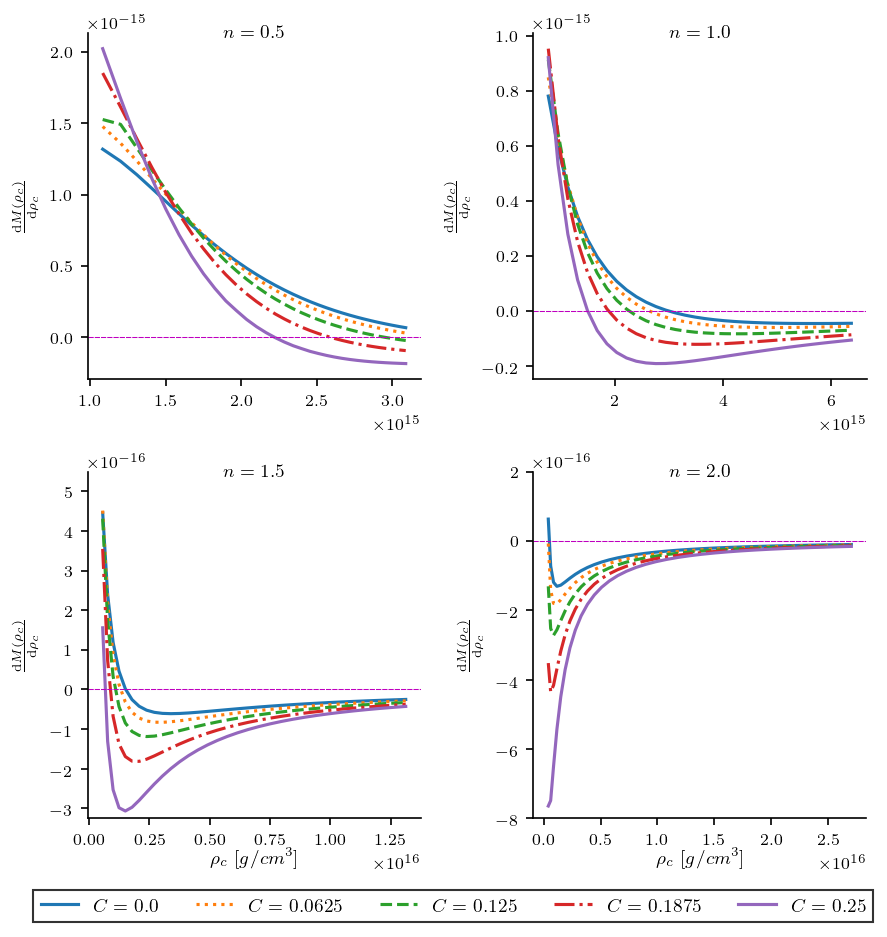

In [9]:
axes = ()
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False,figsize=(6,6),dpi=150)

for j in range(len(Lista_C)):
    
    # Discrete differentiation of the solutions
    dmdrho0 = diff(Lista_M[0][j])/diff(Lista_Rho_c[0][j])
    Lista_Rho_c0 = Lista_Rho_c[0][j][:-1]
    
    dmdrho1 = diff(Lista_M[1][j])/diff(Lista_Rho_c[1][j])
    Lista_Rho_c1 = Lista_Rho_c[1][j][:-1]
    
    dmdrho2 = diff(Lista_M[2][j])/diff(Lista_Rho_c[2][j])
    Lista_Rho_c2 = Lista_Rho_c[2][j][:-1]
    
    dmdrho3 = diff(Lista_M[3][j])/diff(Lista_Rho_c[3][j])
    Lista_Rho_c3 = Lista_Rho_c[3][j][:-1]
    
    axes[0][0].plot(Lista_Rho_c0,dmdrho0,linestyle=LineStyles[j])
    axes[0][1].plot(Lista_Rho_c1,dmdrho1,linestyle=LineStyles[j])
    axes[1][0].plot(Lista_Rho_c2,dmdrho2,linestyle=LineStyles[j])
    axes[1][1].plot(Lista_Rho_c3,dmdrho3,linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))
    
axes[0][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][0].xaxis.set_label_coords(0.5,-0.0875)
axes[0][0].set_title(r'$n = %.1f$'%(Lista_n[0]),x=0.5,y=0.95,fontsize=9)
axes[0][0].spines['right'].set_color('none')
axes[0][0].spines['top'].set_color('none')
axes[0][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[0][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][1].xaxis.set_label_coords(0.5,-0.0875)
axes[0][1].set_title(r'$n = %.1f$'%(Lista_n[1]),x=0.5,y=0.95,fontsize=9)
axes[0][1].spines['right'].set_color('none')
axes[0][1].spines['top'].set_color('none')
axes[0][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][0].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][0].xaxis.set_label_coords(0.5,-0.0875)
axes[1][0].set_ybound(-3.25*10**(-16),5.5*10**(-16))
axes[1][0].set_title(r'$n = %.1f$'%(Lista_n[2]),x=0.5,y=0.95,fontsize=9)
axes[1][0].spines['right'].set_color('none')
axes[1][0].spines['top'].set_color('none')
axes[1][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][1].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][1].set_ybound(-0.8*10**(-15),0.2*10**(-15))
axes[1][1].xaxis.set_label_coords(0.5,-0.0875)
axes[1][1].set_title(r'$n = %.1f$'%(Lista_n[3]),x=0.5,y=0.95,fontsize=9)
axes[1][1].spines['right'].set_color('none')
axes[1][1].spines['top'].set_color('none')
axes[1][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
axes[1][1].legend(ncol=5, loc=(-1.5,-0.3),fontsize=9,edgecolor='k',fancybox=False)

fig.tight_layout()

plt.show()

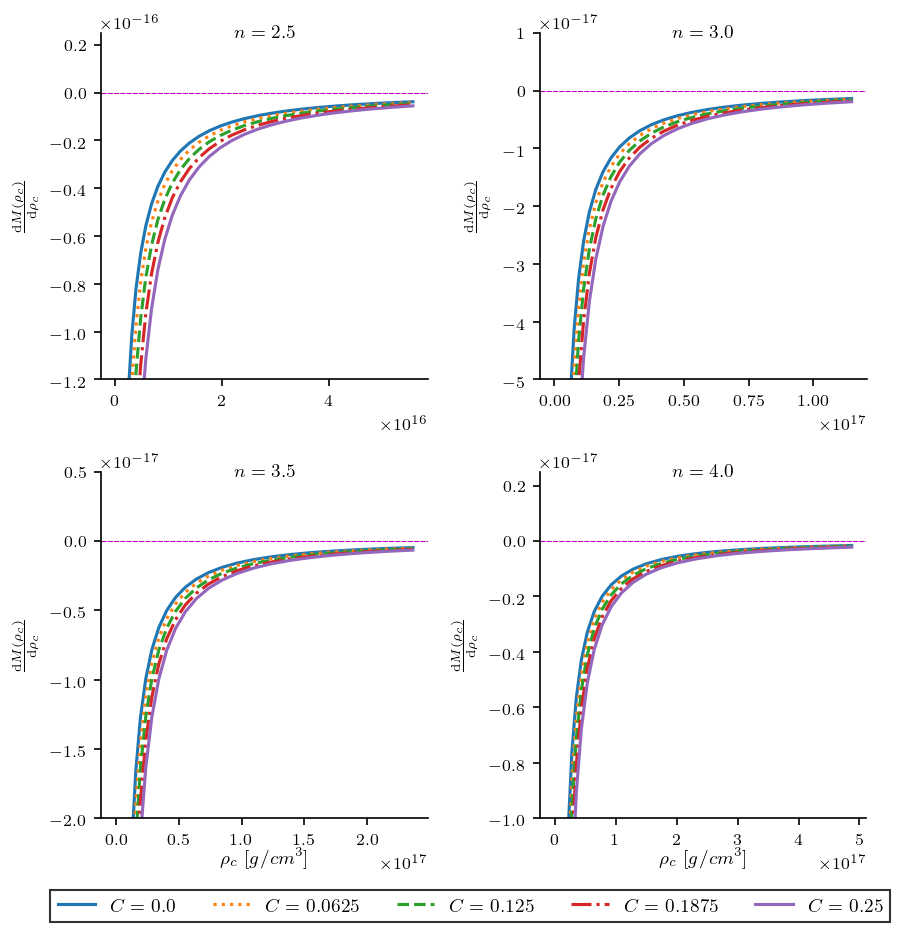

In [10]:
axes = ()
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False,figsize=(6,6),dpi=150)

for j in range(len(Lista_C)):
    
    # Discrete differentiation of the solutions
    dmdrho4 = diff(Lista_M[4][j])/diff(Lista_Rho_c[4][j])
    Lista_Rho_c4 = Lista_Rho_c[4][j][:-1]
    
    dmdrho5 = diff(Lista_M[5][j])/diff(Lista_Rho_c[5][j])
    Lista_Rho_c5 = Lista_Rho_c[5][j][:-1]
    
    dmdrho6 = diff(Lista_M[6][j])/diff(Lista_Rho_c[6][j])
    Lista_Rho_c6 = Lista_Rho_c[6][j][:-1]
    
    dmdrho7 = diff(Lista_M[7][j])/diff(Lista_Rho_c[7][j])
    Lista_Rho_c7 = Lista_Rho_c[7][j][:-1]
    
    axes[0][0].plot(Lista_Rho_c4,dmdrho4,linestyle=LineStyles[j])
    axes[0][1].plot(Lista_Rho_c5,dmdrho5,linestyle=LineStyles[j])
    axes[1][0].plot(Lista_Rho_c6,dmdrho6,linestyle=LineStyles[j])
    axes[1][1].plot(Lista_Rho_c7,dmdrho7,linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))
    
axes[0][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][0].xaxis.set_label_coords(0.5,-0.0875)
axes[0][0].set_ybound(-1.2*10**(-16),2.5*10**(-17))
axes[0][0].set_title(r'$n = %.1f$'%(Lista_n[4]),x=0.5,y=0.95,fontsize=9)
axes[0][0].spines['right'].set_color('none')
axes[0][0].spines['top'].set_color('none')
axes[0][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[0][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][1].xaxis.set_label_coords(0.5,-0.0875)
axes[0][1].set_ybound(-0.5*10**(-16),1*10**(-17))
axes[0][1].set_title(r'$n = %.1f$'%(Lista_n[5]),x=0.5,y=0.95,fontsize=9)
axes[0][1].spines['right'].set_color('none')
axes[0][1].spines['top'].set_color('none')
axes[0][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][0].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][0].xaxis.set_label_coords(0.5,-0.0875)
axes[1][0].set_ybound(-0.2*10**(-16),0.5*10**(-17))
axes[1][0].set_title(r'$n = %.1f$'%(Lista_n[6]),x=0.5,y=0.95,fontsize=9)
axes[1][0].spines['right'].set_color('none')
axes[1][0].spines['top'].set_color('none')
axes[1][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][1].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][1].xaxis.set_label_coords(0.5,-0.0875)
axes[1][1].set_ybound(-0.01*10**(-15),0.25*10**(-17))
axes[1][1].set_title(r'$n = %.1f$'%(Lista_n[7]),x=0.5,y=0.95,fontsize=9)
axes[1][1].spines['right'].set_color('none')
axes[1][1].spines['top'].set_color('none')
axes[1][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
axes[1][1].legend(ncol=5, loc=(-1.5,-0.3),fontsize=9,edgecolor='k',fancybox=False)

fig.tight_layout()

plt.show()

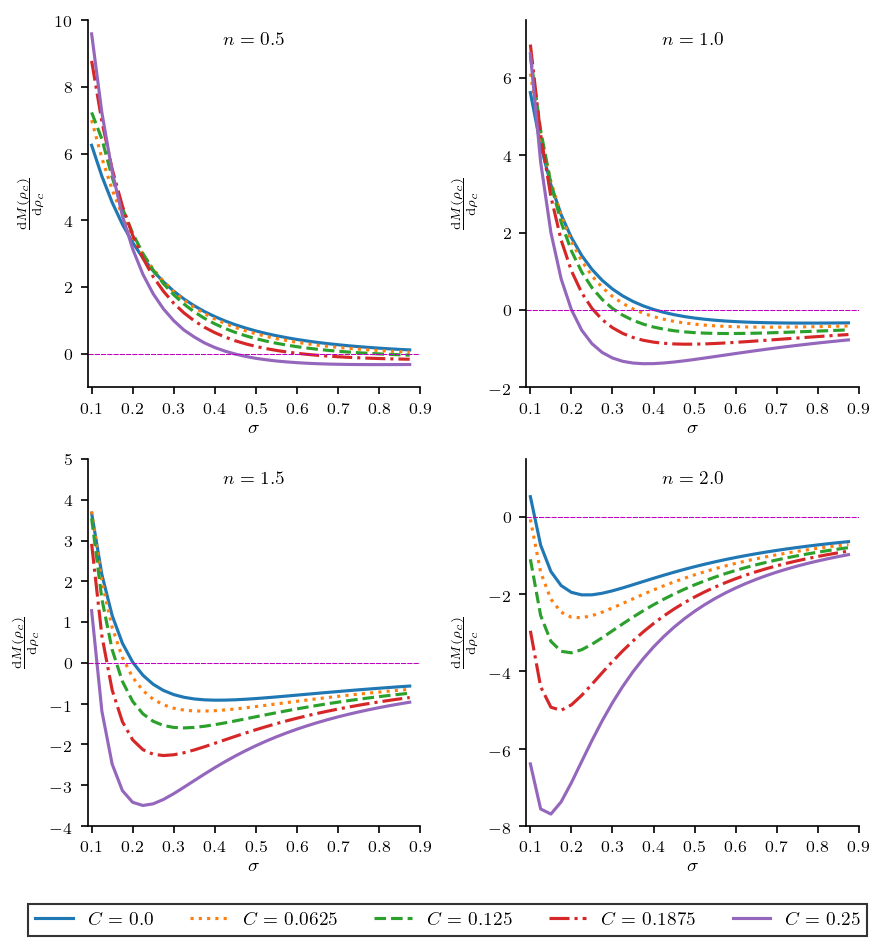

In [11]:
axes = ()
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(6,6),dpi=150)

for j in range(len(Lista_C)):
    
    # Diferenciación discreta de las soluciones obtenidas
    dmdrho0 = diff(Lista_M[0][j])/diff(Lista_sigma_m[0][j])
    Lista_sigma_m0 = Lista_sigma_m[0][j][:-1]
    
    dmdrho1 = diff(Lista_M[1][j])/diff(Lista_sigma_m[1][j])
    Lista_sigma_m1 = Lista_sigma_m[1][j][:-1]
    
    dmdrho2 = diff(Lista_M[2][j])/diff(Lista_sigma_m[2][j])
    Lista_sigma_m2 = Lista_sigma_m[2][j][:-1]
    
    dmdrho3 = diff(Lista_M[3][j])/diff(Lista_sigma_m[3][j])
    Lista_sigma_m3 = Lista_sigma_m[3][j][:-1]

    axes[0][0].plot(Lista_sigma_m0,dmdrho0,linestyle=LineStyles[j])
    axes[0][1].plot(Lista_sigma_m1,dmdrho1,linestyle=LineStyles[j])
    axes[1][0].plot(Lista_sigma_m2,dmdrho2,linestyle=LineStyles[j])
    axes[1][1].plot(Lista_sigma_m3,dmdrho3,linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))

axes[0][0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[0][0].set_xlabel(r'$\sigma$',fontsize=9)
axes[0][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][0].set_xbound(0.09,0.9)
axes[0][0].set_ybound(-1.0,10.0)
axes[0][0].xaxis.set_label_coords(0.5,-0.0875)
axes[0][0].set_title(r'$n = %.1f$'%(Lista_n[0]),x=0.5,y=0.9,fontsize=9)
axes[0][0].spines['right'].set_color('none')
axes[0][0].spines['top'].set_color('none')
axes[0][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[0][1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[0][1].set_xlabel(r'$\sigma$',fontsize=9)
axes[0][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][1].set_xbound(0.09,0.9)
axes[0][1].set_ybound(-2.0,7.5)
axes[0][1].xaxis.set_label_coords(0.5,-0.0875)
axes[0][1].set_title(r'$n = %.1f$'%(Lista_n[1]),x=0.5,y=0.9,fontsize=9)
axes[0][1].spines['right'].set_color('none')
axes[0][1].spines['top'].set_color('none')
axes[0][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[1][0].set_xlabel(r'$\sigma$',fontsize=9)
axes[1][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][0].set_xbound(0.09,0.9)
axes[1][0].set_ybound(-4.0,5.0)
axes[1][0].xaxis.set_label_coords(0.5,-0.0875)
axes[1][0].set_title(r'$n = %.1f$'%(Lista_n[2]),x=0.5,y=0.9,fontsize=9)
axes[1][0].spines['right'].set_color('none')
axes[1][0].spines['top'].set_color('none')
axes[1][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[1][1].set_xlabel(r'$\sigma$',fontsize=9)
axes[1][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][1].set_ybound(-8.0,1.5)
axes[1][1].set_xbound(0.09,0.9)
axes[1][1].xaxis.set_label_coords(0.5,-0.0875)
axes[1][1].set_title(r'$n = %.1f$'%(Lista_n[3]),x=0.5,y=0.9,fontsize=9)
axes[1][1].spines['right'].set_color('none')
axes[1][1].spines['top'].set_color('none')
axes[1][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
axes[1][1].legend(ncol=5, loc=(-1.5,-0.3),fontsize=9,edgecolor='k',fancybox=False)

fig.tight_layout()

plt.show()

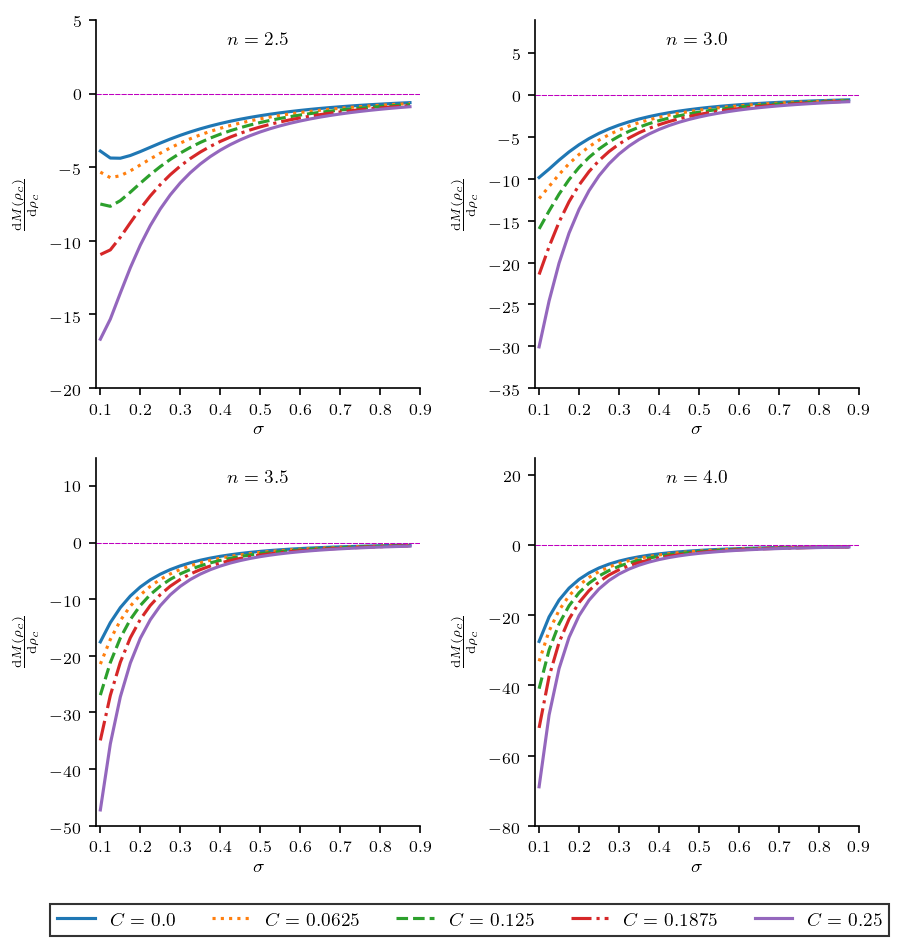

In [12]:
axes = ()
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(6,6),dpi=150)

for j in range(len(Lista_C)):
    
    # Discrete differentiation of the solutions
    dmdrho4 = diff(Lista_M[4][j])/diff(Lista_sigma_m[4][j])
    Lista_sigma_m4 = Lista_sigma_m[4][j][:-1]
    
    dmdrho5 = diff(Lista_M[5][j])/diff(Lista_sigma_m[5][j])
    Lista_sigma_m5 = Lista_sigma_m[5][j][:-1]
    
    dmdrho6 = diff(Lista_M[6][j])/diff(Lista_sigma_m[6][j])
    Lista_sigma_m6 = Lista_sigma_m[6][j][:-1]
    
    dmdrho7 = diff(Lista_M[7][j])/diff(Lista_sigma_m[7][j])
    Lista_sigma_m7 = Lista_sigma_m[7][j][:-1]
    
    axes[0][0].plot(Lista_sigma_m4,dmdrho4,linestyle=LineStyles[j])
    axes[0][1].plot(Lista_sigma_m5,dmdrho5,linestyle=LineStyles[j])
    axes[1][0].plot(Lista_sigma_m6,dmdrho6,linestyle=LineStyles[j])
    axes[1][1].plot(Lista_sigma_m7,dmdrho7,linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))
    
axes[0][0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[0][0].set_xlabel(r'$\sigma$',fontsize=9)
axes[0][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][0].set_xbound(0.09,0.9)
axes[0][0].set_ybound(-20.0,5.0)
axes[0][0].xaxis.set_label_coords(0.5,-0.0875)
axes[0][0].set_title(r'$n = %.1f$'%(Lista_n[4]),x=0.5,y=0.9,fontsize=9)
axes[0][0].spines['right'].set_color('none')
axes[0][0].spines['top'].set_color('none')
axes[0][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[0][1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[0][1].set_xlabel(r'$\sigma$',fontsize=9)
axes[0][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][1].set_xbound(0.09,0.9)
axes[0][1].set_ybound(-35.0,9)
axes[0][1].xaxis.set_label_coords(0.5,-0.0875)
axes[0][1].set_title(r'$n = %.1f$'%(Lista_n[5]),x=0.5,y=0.9,fontsize=9)
axes[0][1].spines['right'].set_color('none')
axes[0][1].spines['top'].set_color('none')
axes[0][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[1][0].set_xlabel(r'$\sigma$',fontsize=9)
axes[1][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][0].set_xbound(0.09,0.9)
axes[1][0].set_ybound(-50.0,15.0)
axes[1][0].xaxis.set_label_coords(0.5,-0.0875)
axes[1][0].set_title(r'$n = %.1f$'%(Lista_n[6]),x=0.5,y=0.9,fontsize=9)
axes[1][0].spines['right'].set_color('none')
axes[1][0].spines['top'].set_color('none')
axes[1][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[1][1].set_xlabel(r'$\sigma$',fontsize=9)
axes[1][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][1].set_xbound(0.09,0.9)
axes[1][1].set_ybound(-80.0,25.0)
axes[1][1].xaxis.set_label_coords(0.5,-0.0875)
axes[1][1].set_title(r'$n = %.1f$'%(Lista_n[7]),x=0.5,y=0.9,fontsize=9)
axes[1][1].spines['right'].set_color('none')
axes[1][1].spines['top'].set_color('none')
axes[1][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
axes[1][1].legend(ncol=5, loc=(-1.5,-0.3),fontsize=9,edgecolor='k',fancybox=False)

fig.tight_layout()

plt.show()

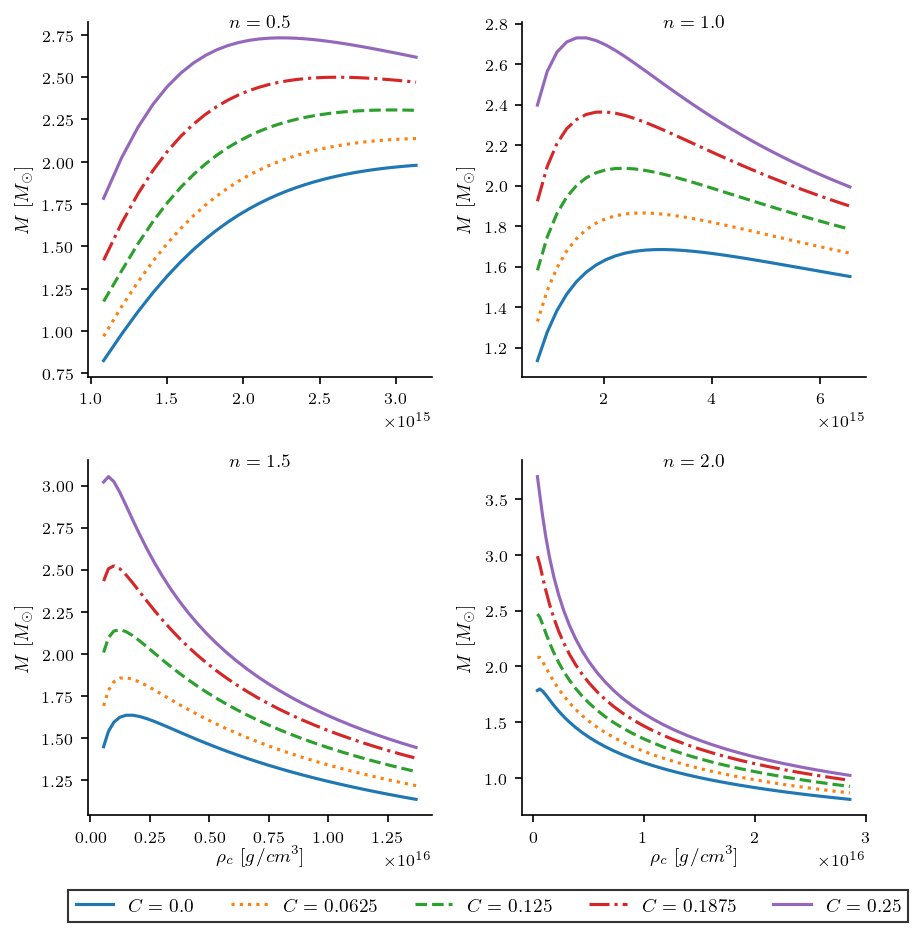

In [13]:
axes = ()
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False,figsize=(6,6),dpi=150)

for j in range(len(Lista_C)):
    
    axes[0][0].plot(Lista_Rho_c[0][j],Lista_M[0][j],linestyle=LineStyles[j])
    axes[0][1].plot(Lista_Rho_c[1][j],Lista_M[1][j],linestyle=LineStyles[j])
    axes[1][0].plot(Lista_Rho_c[2][j],Lista_M[2][j],linestyle=LineStyles[j])
    axes[1][1].plot(Lista_Rho_c[3][j],Lista_M[3][j],linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))
    
axes[0][0].set_ylabel(r'$M \, \, [M_{\odot}]$',fontsize=9)
axes[0][0].xaxis.set_label_coords(0.5,-0.0875)
axes[0][0].set_title(r'$n = %.1f$'%(Lista_n[0]),x=0.5,y=0.95,fontsize=9)
axes[0][0].spines['right'].set_color('none')
axes[0][0].spines['top'].set_color('none')

axes[0][1].set_ylabel(r'$M \, \, [M_{\odot}]$',fontsize=9)
axes[0][1].xaxis.set_label_coords(0.5,-0.0875)
axes[0][1].set_title(r'$n = %.1f$'%(Lista_n[1]),x=0.5,y=0.95,fontsize=9)
axes[0][1].spines['right'].set_color('none')
axes[0][1].spines['top'].set_color('none')

axes[1][0].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][0].set_ylabel(r'$M \, \, [M_{\odot}]$',fontsize=9)
axes[1][0].xaxis.set_label_coords(0.5,-0.0875)
axes[1][0].set_title(r'$n = %.1f$'%(Lista_n[2]),x=0.5,y=0.95,fontsize=9)
axes[1][0].spines['right'].set_color('none')
axes[1][0].spines['top'].set_color('none')

axes[1][1].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][1].set_ylabel(r'$M \, \, [M_{\odot}]$',fontsize=9)
axes[1][1].xaxis.set_label_coords(0.5,-0.0875)
axes[1][1].set_title(r'$n = %.1f$'%(Lista_n[3]),x=0.5,y=0.95,fontsize=9)
axes[1][1].spines['right'].set_color('none')
axes[1][1].spines['top'].set_color('none')
axes[1][1].legend(ncol=5, loc=(-1.32,-0.3),fontsize=9,edgecolor='k',fancybox=False)

fig.tight_layout()

plt.show()